## Exponential decay and optimal tau
Fitting an exponential decay function to the Amplitude data and finding the optimal

Optimized parameter: tau = 13.870492890258987


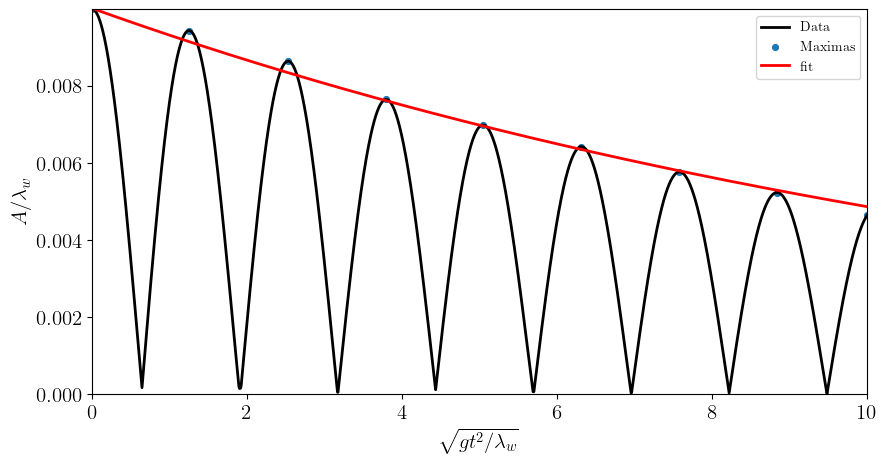

In [43]:
#Import relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#Use Latex and serif font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

##Functions:
#Reads data from a file and separates columns into variables of time and Amplitude
def read_extract(dat_file):
    df = pd.read_csv(dat_file, sep=' ')
    df.head()
    nb_col = len(df.columns)
    
    if (nb_col==2):
        t = df.iloc[:, 0].to_numpy()
        Amp = df.iloc[:, 1].to_numpy()
        A0 = Amp[0]
        return A0, t, Amp
    
    else :
        t = df.iloc[:, 0].to_numpy()
        AmpOcean = df.iloc[:, 1].to_numpy()
        AmpIce = df.iloc[:, 2].to_numpy()
        A0_Ocean = AmpOcean[0]
        A0_Ice = AmpIce[0]
        return A0_Ocean, A0_Ice, t, AmpOcean, AmpIce

# Define the decaying exponential function
def decay_function(t, tau):
    return 0.01 * np.exp(-t / tau)


##Data and fitting:
#Initialize and extract relavant variables 
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
A0, t, Amp = read_extract(f'/Volumes/Jalaal/Valentin/WavesWater_/{1002}/amplitude.dat')

#Find local maxima and create array with only the maximas 
peaks, _ = find_peaks(Amp)
t_max = np.concatenate(([t[0]], t[peaks], [t[-1]]))
Amp_max = np.concatenate(([Amp[0]], Amp[peaks], [Amp[-1]]))

#Find optimal tau with curve fit 
initial_guess_tau = 1.0
popt, pcov = curve_fit(decay_function, t_max, Amp_max, p0=initial_guess_tau)
tau_opt = popt[0]
print("Optimized parameter: tau =", tau_opt)


##Plot:
#Plot graph with maxima and decaying exponential
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t, Amp, colors[0], lw=2, label='Data')
ax.scatter(t_max, Amp_max, lw=2, s=10, label='Maximas')
ax.plot(t,decay_function(t,tau_opt), colors[1], lw=2, label='fit')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 10])
ax.set_ylim([0., A0])
ax.legend()
#plt.title("Decay_Ga1e6")
#plt.savefig("Decay_Ga1e6")
plt.show()    